In [17]:
#pip install streamlit
#International_Report_Departures.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px

In [2]:
data=input()
if data[-3:]=='csv':
    df=pd.read_csv(data)
elif data[-5:]=='excel':
    df=pd.read_excel(data)
else:
    df=pd.read_sql(data)

International_Report_Departures.csv


In [3]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [4]:
high = df[df['carriergroup'] ==1]
high

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
6,02/01/2002,2002,2,14100,PHL,23,11032,CUN,148,20402,MMQ,1,Departures,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930800,05/01/2000,2000,5,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1272,0,1272
930801,08/01/1998,1998,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1308,0,1308
930802,07/01/1998,1998,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1328,0,1328
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422


In [5]:
low = df[df['carriergroup'] ==0]
low

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
5,10/01/2007,2007,10,14761,SFB,33,11928,GLA,493,20444,JN,0,Departures,0,8,8
8,11/01/2001,2001,11,13930,ORD,41,16042,YEG,916,19531,AC,0,Departures,0,1,1
11,09/01/2008,2008,9,15016,STL,64,16271,YYZ,936,19531,AC,0,Departures,0,1,1
14,05/01/2009,2009,5,13930,ORD,41,11032,CUN,148,19534,AM,0,Departures,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930780,11/01/2017,2017,11,10299,ANC,1,15306,TPE,781,19544,CI,0,Departures,1044,0,1044
930793,04/01/2019,2019,4,13204,MCO,33,14286,PTY,162,19770,CM,0,Departures,1096,0,1096
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


In [6]:
high.groupby('carriergroup').mean()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,Scheduled,Charter,Total
carriergroup,,,,,,,,,,
1,2006.177877,6.393811,12789.502626,41.367689,13481.398941,431.915143,20102.903805,38.663986,2.282075,40.946061


In [7]:
low.groupby('carriergroup').mean()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,Scheduled,Charter,Total
carriergroup,,,,,,,,,,
0,2005.787211,6.446157,12839.350879,44.223256,13489.579117,519.26394,19988.870226,42.006634,1.591698,43.598333


In [5]:
pd.crosstab(df['carriergroup'] , df['Month'])

Month,1,2,3,4,5,6,7,8,9,10,11,12
carriergroup,,,,,,,,,,,,
0,32488,31770,33211,31078,30022,30289,30513,30457,30121,30795,30303,31871
1,48746,47828,50593,46693,44981,47674,47472,46902,43155,42621,43684,47541


In [7]:
df.corr()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.021233,0.005048,0.065969,0.053412,0.045974,0.312519,0.022367,0.069213,-0.052756,0.062673
Month,-0.021233,1.000000,-0.000944,-0.001765,-0.000760,0.017482,-0.004098,-0.007390,0.013036,-0.007488,0.012140
usg_apt_id,0.005048,-0.000944,1.000000,0.069199,0.030126,-0.002550,0.050586,-0.008993,-0.022789,0.000585,-0.022939
usg_wac,0.065969,-0.001765,0.069199,1.000000,0.096134,-0.043867,-0.004251,-0.050752,0.041788,-0.024382,0.038864
fg_apt_id,0.053412,-0.000760,0.030126,0.096134,1.000000,0.505629,0.076175,-0.002074,0.082709,-0.027337,0.079792
fg_wac,0.045974,0.017482,-0.002550,-0.043867,0.505629,1.000000,-0.002809,-0.148620,0.109073,-0.039502,0.104752
airlineid,0.312519,-0.004098,0.050586,-0.004251,0.076175,-0.002809,1.000000,0.116642,-0.144813,0.081447,-0.135098
carriergroup,0.022367,-0.007390,-0.008993,-0.050752,-0.002074,-0.148620,0.116642,1.000000,-0.026875,0.040866,-0.021539
Scheduled,0.069213,0.013036,-0.022789,0.041788,0.082709,0.109073,-0.144813,-0.026875,1.000000,-0.141007,0.990733
Charter,-0.052756,-0.007488,0.000585,-0.024382,-0.027337,-0.039502,0.081447,0.040866,-0.141007,1.000000,-0.005234


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [7]:
df.shape

(930808, 16)

In [8]:
df.dtypes

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

In [9]:
df.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


In [10]:
df.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [8]:
df['carrier'] = df['carrier'].fillna('Not Specified')

In [9]:
df.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [10]:
df['data_dte']=pd.to_datetime(df['data_dte'])

In [14]:
for col in df.columns:
    print(col)
    print(df[col].value_counts().nlargest(3))
    print('===================================')

data_dte
2018-03-01    3471
2019-06-01    3448
2018-06-01    3440
Name: data_dte, dtype: int64
Year
2018    39926
2017    38993
2019    38589
Name: Year, dtype: int64
Month
3    83804
1    81234
2    79598
Name: Month, dtype: int64
usg_apt_id
13303    133820
12478     78824
12892     57492
Name: usg_apt_id, dtype: int64
usg_apt
MIA    133820
JFK     78824
LAX     57492
Name: usg_apt, dtype: int64
usg_wac
33    192897
22    105979
91     95137
Name: usg_wac, dtype: int64
fg_apt_id
16271    50044
11032    32168
13252    26781
Name: fg_apt_id, dtype: int64
fg_apt
YYZ    50044
CUN    32168
MEX    26781
Name: fg_apt, dtype: int64
fg_wac
148    151405
936     68885
493     49936
Name: fg_wac, dtype: int64
airlineid
19805    58739
19790    48520
19977    42469
Name: airlineid, dtype: int64
carrier
AA    58739
DL    48520
UA    42469
Name: carrier, dtype: int64
carriergroup
1    557890
0    372918
Name: carriergroup, dtype: int64
type
Departures    930808
Name: type, dtype: int64
Scheduled
0  

In [49]:
#def explor(col):
  #  fig , axs = plt.subplots(1,2 ,figsize=(13,5))
   # sb.countplot(ax = axs[0] , data = df , x = col)
    #sb.barplot(ax=axs[1] , data=df , x=col ,y ='carriergroup')
    

In [12]:
df.head(1)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10


In [6]:
df.head(1)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10


# encoding categorical features

In [16]:
df_en = pd.get_dummies(df[['usg_apt']] )
df_en

,usg_apt_1B1,usg_apt_3TX,usg_apt_A31,usg_apt_ABE,usg_apt_ABI,usg_apt_ABL,usg_apt_ABQ,usg_apt_ABR,usg_apt_ABY,usg_apt_ACK,...,usg_apt_XXX,usg_apt_XXZ,usg_apt_YAK,usg_apt_YIP,usg_apt_YKM,usg_apt_YNG,usg_apt_YUM,usg_apt_ZXU,usg_apt_ZXX,usg_apt_ZZZ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_en2 = pd.get_dummies(df[['fg_apt']] )
df_en2

,fg_apt_AAB,fg_apt_AAL,fg_apt_AAO,fg_apt_AAR,fg_apt_ABA,fg_apt_ABJ,fg_apt_ABV,fg_apt_ABZ,fg_apt_ACA,fg_apt_ACC,...,fg_apt_ZNA,fg_apt_ZQN,fg_apt_ZRH,fg_apt_ZSA,fg_apt_ZSL,fg_apt_ZSW,fg_apt_ZTS,fg_apt_ZUH,fg_apt_ZXA,fg_apt_ZXD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_en3 = pd.get_dummies(df[['carrier']]  )
df_en3

,carrier_02Q,carrier_04Q,carrier_05Q,carrier_07Q,carrier_09Q,carrier_0BQ,carrier_0CQ,carrier_0HQ,carrier_0J,carrier_0JQ,...,carrier_ZKQ,carrier_ZL,carrier_ZN,carrier_ZP,carrier_ZQ,carrier_ZS,carrier_ZUQ,carrier_ZV,carrier_ZW,carrier_ZX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['usg_apt' ,'fg_apt' ,'carrier'],axis ='columns')

In [32]:
df = df.drop('type' ,axis =1)

In [ ]:
data = pd.concat([df ,df_en ,df_en2 ,df_en3] ,axis='columns')

In [39]:
data

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,carrier_ZKQ,carrier_ZL,carrier_ZN,carrier_ZP,carrier_ZQ,carrier_ZS,carrier_ZUQ,carrier_ZV,carrier_ZW,carrier_ZX
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,...,0,0,0,0,0,0,0,0,0,0
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,...,0,0,0,0,0,0,0,0,0,0
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,...,0,0,0,0,0,0,0,0,0,0
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,...,0,0,0,0,0,0,0,0,0,0
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,...,0,0,0,0,0,0,0,0,0,0
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,...,0,0,0,0,0,0,0,0,0,0
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,...,0,0,0,0,0,0,0,0,0,0
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.drop(['usg_apt', 'fg_apt', 'carrier'], axis='columns', inplace=True)

# Scalling

In [46]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [47]:
#numeric_cols = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]

In [ ]:
scaled_data =st.fit_transform(data)
scaled_data

In [ ]:
sb.histplot(data = df , x='Year')
plt.show()

In [ ]:
sb.histplot(data = df , x='Month')
plt.show()

In [ ]:
df.groupby('carriergroup')['usg_apt_id'].mean()

In [ ]:
plt.figure(figsize=(15,5))
sb.boxenplot(data =df)

In [ ]:
sb.scatterplot(data = df , x='airlineid' , y='Year')

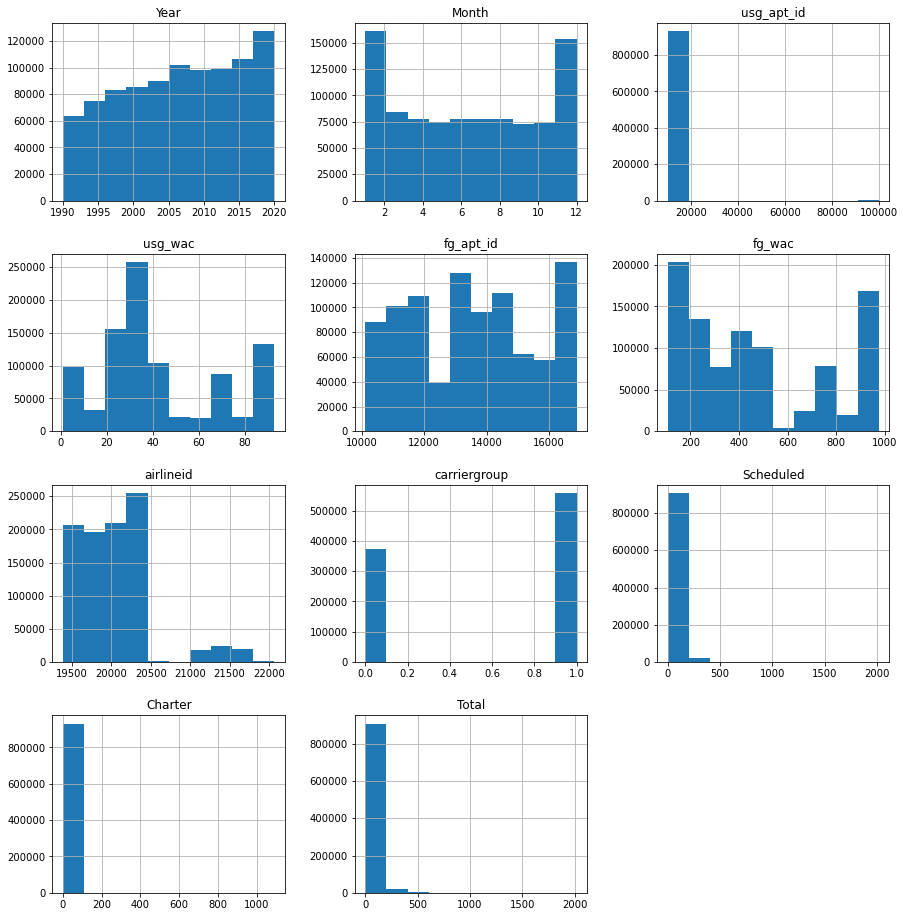

In [5]:
df.hist(figsize=(15,16))
plt.show()

<AxesSubplot:xlabel='carriergroup', ylabel='count'>

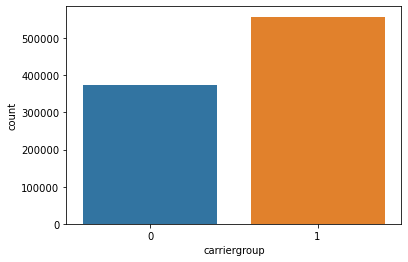

In [57]:
sb.countplot(data =df , x='carriergroup')

In [59]:
df.groupby('carriergroup').mean()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,Scheduled,Charter,Total
carriergroup,,,,,,,,,,
0,2005.787211,6.446157,12839.350879,44.223256,13489.579117,519.263940,19988.870226,42.006634,1.591698,43.598333
1,2006.177877,6.393811,12789.502626,41.367689,13481.398941,431.915143,20102.903805,38.663986,2.282075,40.946061


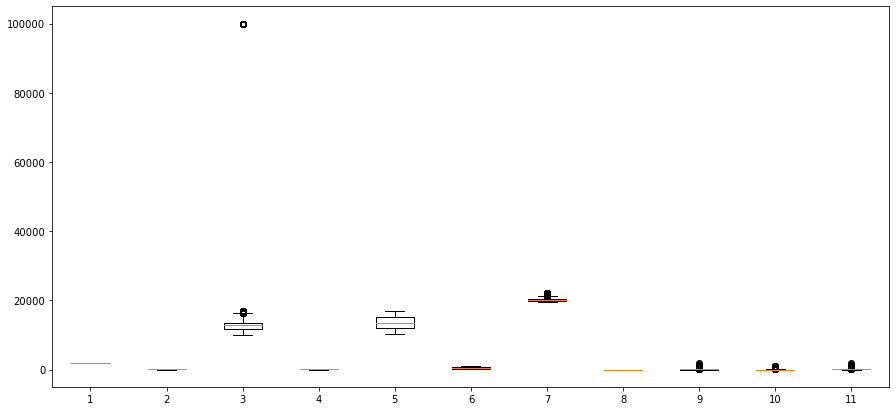

In [77]:
plt.figure(figsize=(15,7))
plt.boxplot(df[numeric_cols])
plt.show()

<AxesSubplot:xlabel='Month', ylabel='count'>

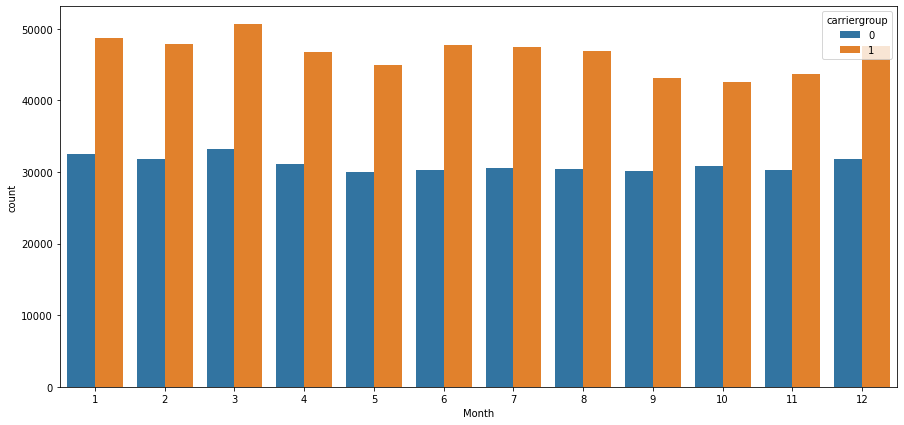

In [75]:
plt.figure(figsize=(15,7))
sb.countplot(data = df , x='Month' ,hue='carriergroup')

<AxesSubplot:xlabel='Year', ylabel='count'>

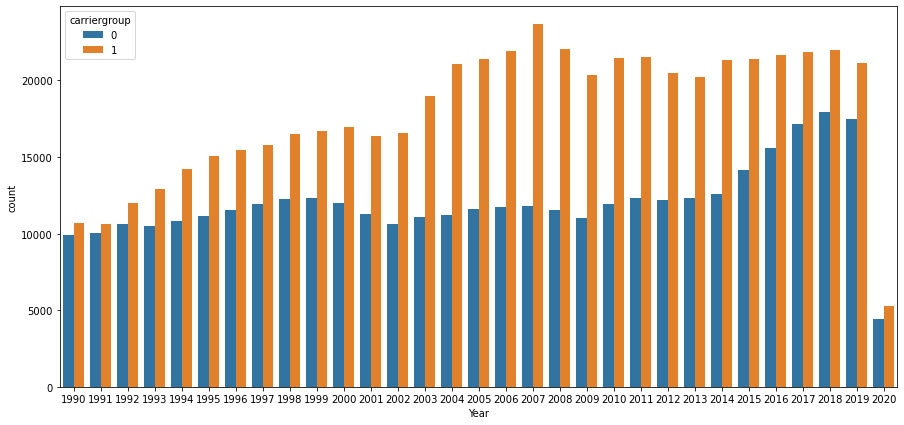

In [11]:
plt.figure(figsize=(15,7))
sb.countplot(data = df , x='Year' ,hue='carriergroup')